In [330]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set() 
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

In [331]:
df = pd.read_csv("data/processed_data.csv")
print(df.shape)
df.sample(5)

(973, 19)


,GRUPO EN NIIF,SUPERVISOR_SUPERFINANCIERA,SUPERVISOR_SUPERSALUD,SUPERVISOR_SUPERSERVICIOS,SUPERVISOR_SUPERSOCIEDADES,SUPERVISOR_SUPERVIGILANCIA,REGION_Antioquia,REGION_Bogotá - Cundinamarca,REGION_Costa Atlantica,REGION_Costa Pacífica,REGION_Otros,MACROSECTOR_AGROPECUARIO,MACROSECTOR_COMERCIO,MACROSECTOR_CONSTRUCCION,MACROSECTOR_MANUFACTURA,MACROSECTOR_MINERO-HIDROCARBUROS,MACROSECTOR_SERVICIOS,VARIACION ACTIVOS,GANANCIA (PERDIDA) PROMEDIO
764,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0.198383,3.410922e+07
503,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0.212764,-9.335002e+08
45,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,-0.005780,3.316472e+07
900,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0.071534,6.871332e+09
863,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0.117302,1.663086e+09


In [332]:
# Estandarización de los datos
df = (df-df.min())/(df.max()-df.min())
df.describe()

,GRUPO EN NIIF,SUPERVISOR_SUPERFINANCIERA,SUPERVISOR_SUPERSALUD,SUPERVISOR_SUPERSERVICIOS,SUPERVISOR_SUPERSOCIEDADES,SUPERVISOR_SUPERVIGILANCIA,REGION_Antioquia,REGION_Bogotá - Cundinamarca,REGION_Costa Atlantica,REGION_Costa Pacífica,REGION_Otros,MACROSECTOR_AGROPECUARIO,MACROSECTOR_COMERCIO,MACROSECTOR_CONSTRUCCION,MACROSECTOR_MANUFACTURA,MACROSECTOR_MINERO-HIDROCARBUROS,MACROSECTOR_SERVICIOS,VARIACION ACTIVOS,GANANCIA (PERDIDA) PROMEDIO
count,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000
mean,0.230216,0.039054,0.030832,0.016444,0.909558,0.004111,0.163412,0.554985,0.096608,0.127441,0.057554,0.023638,0.305242,0.065776,0.338129,0.054471,0.212744,0.367541,0.512286
std,0.421187,0.193824,0.172953,0.127241,0.286961,0.064018,0.369931,0.497223,0.295576,0.333638,0.233018,0.151997,0.460746,0.248018,0.473316,0.227061,0.409459,0.084160,0.081666
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.327036,0.500277
50%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.355576,0.501995
75%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.394646,0.507527
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [333]:
nbrs = NearestNeighbors(n_neighbors=19).fit(df)

# Find the k-neighbors of a point
neigh_dist, neigh_ind = nbrs.kneighbors(df)
# sort the neighbor distances (lengths to points) in ascending order
# axis = 0 represents sort along first axis i.e. sort along row
sort_neigh_dist = np.sort(neigh_dist, axis=0)

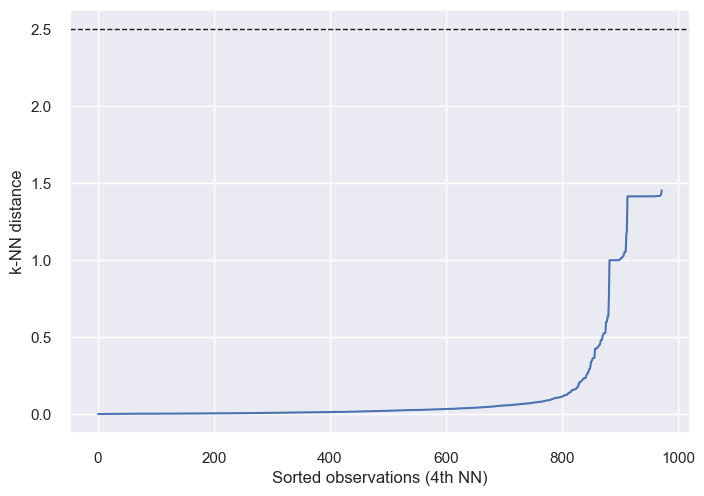

In [334]:
# Now, get the sorted kth column (distances with kth neighbors) and plot the kNN distance plot
k_dist = sort_neigh_dist[:, 4]
plt.plot(k_dist)
plt.axhline(y=2.5, linewidth=1, linestyle='dashed', color='k')
plt.ylabel("k-NN distance")
plt.xlabel("Sorted observations (4th NN)")
plt.show()

In [335]:
clusters = DBSCAN(eps=0.4, min_samples=19).fit(df)

# check unique clusters (-1 is noise)
cluster_labels = set(clusters.labels_)
print(cluster_labels)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, -1}


In [336]:
# Get clusters size 
from collections import Counter
cluster_sizes = Counter(clusters.labels_)
print(cluster_sizes)

Counter({-1: 304, 1: 138, 0: 112, 6: 90, 4: 53, 8: 52, 7: 38, 5: 36, 9: 34, 3: 28, 11: 24, 10: 22, 12: 22, 2: 20})


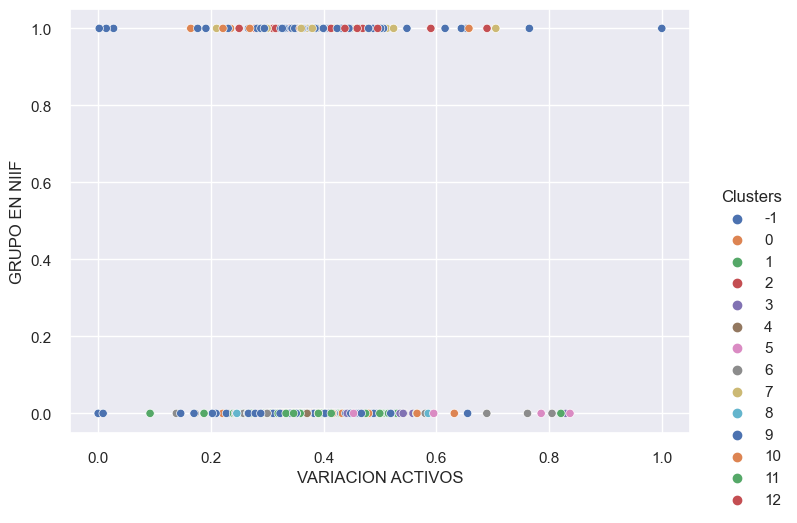

In [352]:
# Visualize clusters
p = sns.scatterplot(data=df, x="VARIACION ACTIVOS", y="GRUPO EN NIIF", hue=clusters.labels_, legend="full", palette="deep")
sns.move_legend(p, "center right", bbox_to_anchor=(1.17,.2), title='Clusters')
plt.show()

In [348]:
# Para medir la eficacia del modelo se utilizará el Silhouette Score que nos indica que tan bien agrupados están los datos en cada cluster. Se busca que el valor obtenido sea lo más cercano a uno (1) posible.
score = silhouette_score(df, clusters.labels_, metric='euclidean')
print('Silhouette score: %.3f' % score)

Silhouette score: 0.537


In [349]:
df_clusterd = df.copy()
df_clusterd['cluster'] = clusters.labels_
df_clusterd.sample(5)

,GRUPO EN NIIF,SUPERVISOR_SUPERFINANCIERA,SUPERVISOR_SUPERSALUD,SUPERVISOR_SUPERSERVICIOS,SUPERVISOR_SUPERSOCIEDADES,SUPERVISOR_SUPERVIGILANCIA,REGION_Antioquia,REGION_Bogotá - Cundinamarca,REGION_Costa Atlantica,REGION_Costa Pacífica,REGION_Otros,MACROSECTOR_AGROPECUARIO,MACROSECTOR_COMERCIO,MACROSECTOR_CONSTRUCCION,MACROSECTOR_MANUFACTURA,MACROSECTOR_MINERO-HIDROCARBUROS,MACROSECTOR_SERVICIOS,VARIACION ACTIVOS,GANANCIA (PERDIDA) PROMEDIO,cluster
885,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.387217,0.501110,-1
258,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.326051,0.515239,1
9,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.422469,0.508763,0
418,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.354974,0.504118,2
271,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.406166,0.502016,-1


In [350]:
from pathlib import Path

try:
    filepath = Path('data/clustered_data_dbscan.csv')
    df_clusterd.to_csv(filepath, index=False)
    print("Archivo guardado exitosamente")
except:
    print("Error al guardar el archivo")

Archivo guardado exitosamente


<AxesSubplot:xlabel='cluster', ylabel='VARIACION ACTIVOS'>

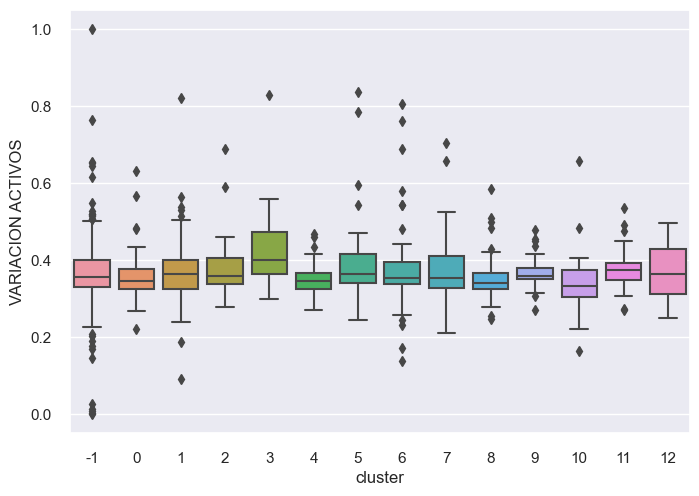

In [351]:
# Graficar variacion de activos dado el cluster
sns.boxplot(x="cluster", y="VARIACION ACTIVOS", data=df_clusterd)

<AxesSubplot:xlabel='cluster', ylabel='GANANCIA (PERDIDA) PROMEDIO'>

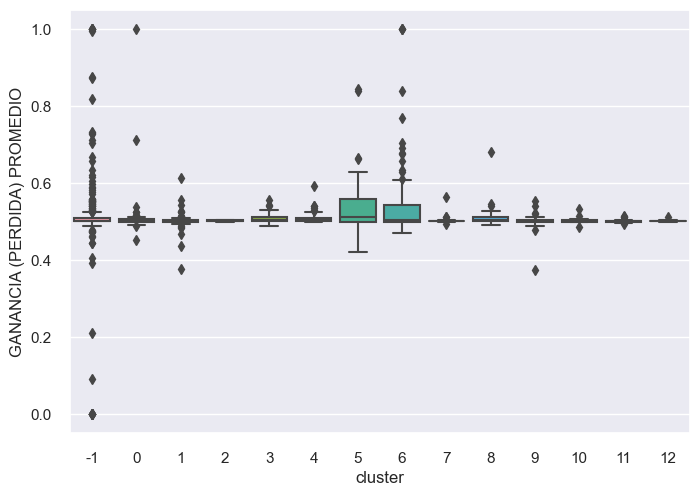

In [342]:
# Graficar variacion de activos dado el cluster
sns.boxplot(x="cluster", y="GANANCIA (PERDIDA) PROMEDIO", data=df_clusterd)

<AxesSubplot:xlabel='cluster', ylabel='GRUPO EN NIIF'>

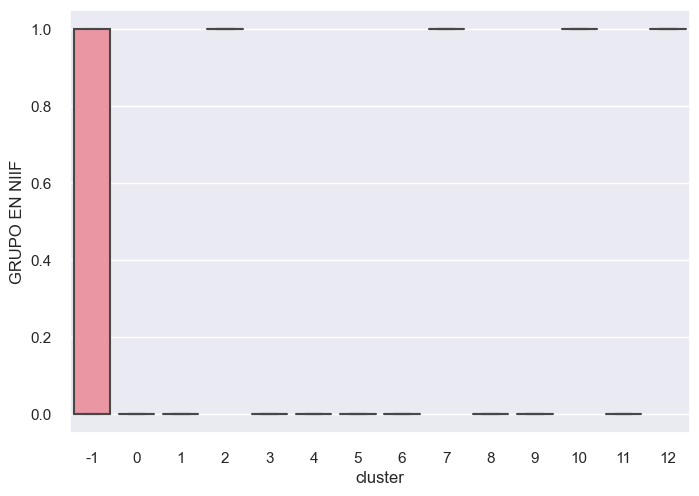

In [343]:
# Graficar variacion de activos dado el cluster
sns.boxplot(x="cluster", y="GRUPO EN NIIF", data=df_clusterd)

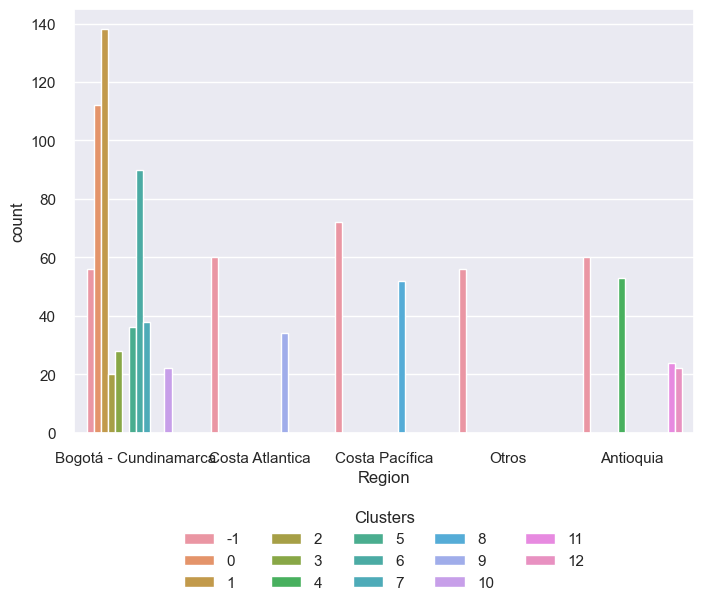

In [344]:
# En df_clusteres se crea una columna que reune todas las columnas marcadas con REGION
def label_region (row):
   if row['REGION_Antioquia'] == 1 :
      return 'Antioquia'
   if row['REGION_Bogotá - Cundinamarca'] == 1 :
      return 'Bogotá - Cundinamarca'
   if row['REGION_Costa Atlantica'] == 1 :
      return 'Costa Atlantica'
   if row['REGION_Costa Pacífica'] == 1:
      return 'Costa Pacífica'
   if row['REGION_Otros']  == 1:
      return 'Otros'
   return 'None' 

df_clusterd['Region'] = df_clusterd.apply (lambda row: label_region(row), axis=1)

# Graficar numero de empresas en una region por cluster
sns.countplot(x="Region", hue="cluster", data=df_clusterd)
# Mover la leyenda abajo centrada y en varias columnas
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=5, title='Clusters')

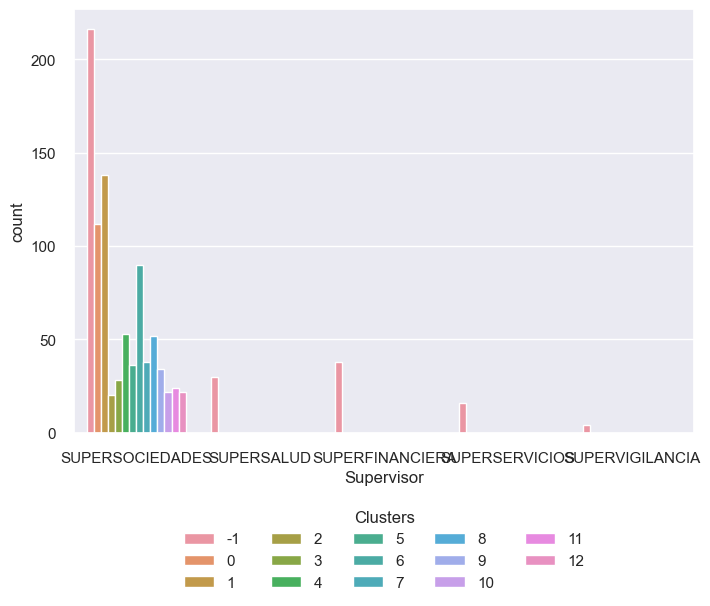

In [345]:
# En df_clusteres se crea una columna que reune todas las columnas marcadas con SUPERVISOR
def label_supervisor (row):
    if row['SUPERVISOR_SUPERFINANCIERA'] == 1 :
        return 'SUPERFINANCIERA'
    if row['SUPERVISOR_SUPERSALUD'] == 1 :
        return 'SUPERSALUD'
    if row['SUPERVISOR_SUPERSERVICIOS'] == 1 :
        return 'SUPERSERVICIOS'
    if row['SUPERVISOR_SUPERSOCIEDADES'] == 1:
        return 'SUPERSOCIEDADES'
    if row['SUPERVISOR_SUPERVIGILANCIA']  == 1:
        return 'SUPERVIGILANCIA'
    return 'None'

df_clusterd['Supervisor'] = df_clusterd.apply (lambda row: label_supervisor(row), axis=1)

# Graficar numero de empresas en una region por cluster
sns.countplot(x="Supervisor", hue="cluster", data=df_clusterd)
# Mover la leyenda abajo centrada y en varias columnas
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=5, title='Clusters')

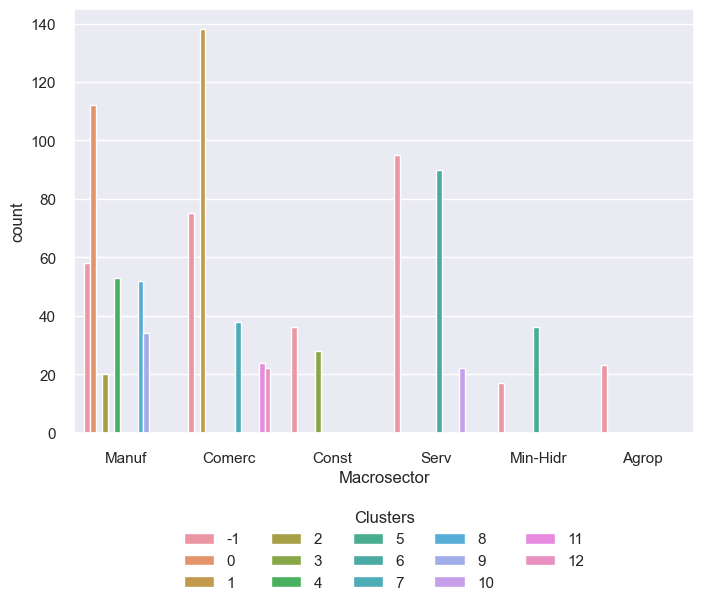

In [346]:
# En df_clusteres se crea una columna que reune todas las columnas marcadas con MACROSECTOR
def label_macrosector (row):
    if row['MACROSECTOR_CONSTRUCCION'] == 1 :
        return 'Const'
    if row['MACROSECTOR_AGROPECUARIO'] == 1 :
        return 'Agrop'
    if row['MACROSECTOR_MANUFACTURA'] == 1 :
        return 'Manuf'
    if row['MACROSECTOR_COMERCIO'] == 1:
        return 'Comerc'
    if row['MACROSECTOR_MINERO-HIDROCARBUROS'] == 1:
        return 'Min-Hidr'
    if row['MACROSECTOR_SERVICIOS'] == 1:
        return 'Serv'
    if row['MACROSECTOR_OTROS']  == 1:
        return 'Otros'
    return 'None'

df_clusterd['Macrosector'] = df_clusterd.apply (lambda row: label_macrosector(row), axis=1)

# Graficar numero de empresas en un macrosector por cluster
sns.countplot(x="Macrosector", hue="cluster", data=df_clusterd)
# Mover la leyenda abajo centrada y en varias columnas
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=5, title='Clusters')